In [ ]:
%pip install scipy
%pip install matplotlib
%pip install SpeechRecognition

Conversão para .WAV

In [ ]:
# import required modules 
import subprocess 

# convert to wav file 
subprocess.call(['ffmpeg', '-i', 'THE HEART PART 6 - DRAKE.mp3', 
                 'THE HEART PART 6 - DRAKE.wav'])

Conversão audios estereos para mono

Text(0, 0.5, 'Amplitute')

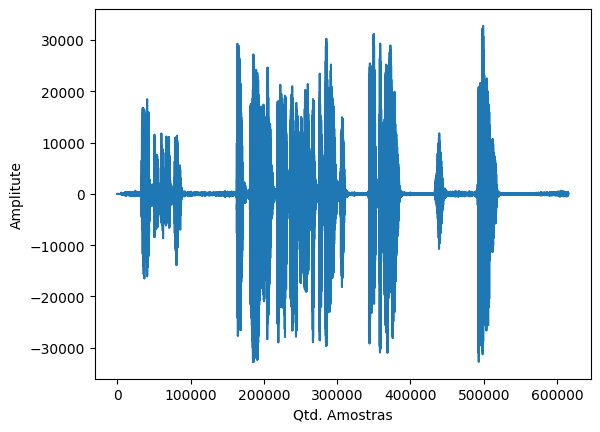

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile as wav

rate, data = wav.read('joao.wav')

# somando os dois canais e normalizando (passadno de estereo para mono)
# mono_data = np.sum(data, axis=1) / 2 
plt.plot(data)
plt.xlabel('Qtd. Amostras')
plt.ylabel('Amplitute')

Converter qtd. amostra para tempo (Eixo X)

Text(0, 0.5, 'Amplitute')

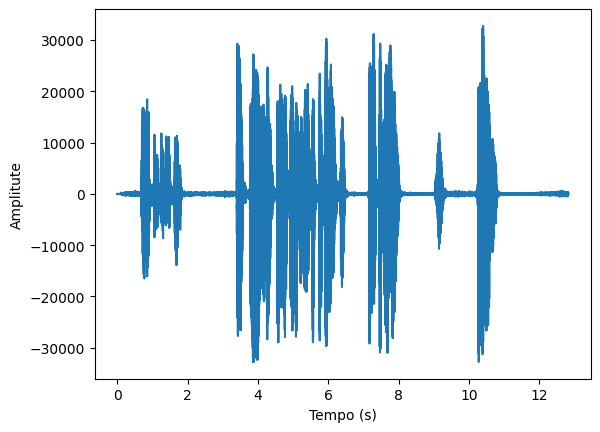

In [15]:
# encontrar o comprimento (total de amostras)
n = len(data)

# Frequencia de amostragem por sinal (quantas amostras por segundo)
fs = 48000 #48khz (audio) ou 44100 44.1khz (padrao spotify apple music) 
# https://emastered.com/pt/blog/sample-rate-for-audio#:~:text=A%20melhor%20taxa%20de%20amostragem,da%20sua%20onda%20sonora%20original.


T = 1/fs # tempo entre uma amostra e outra (inverso entre uma amostra e outra)

t = np.arange(0,n/fs,T) # (vetor de tempo) começa em 0seg, vai até o valor final do comprimento / frequencia de amostragem, e vai andando de T em T (valor calculado na variavel T)

plt.plot(t, data)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitute')

Transformada de Fourier

Text(0, 0.5, 'Amplitute')

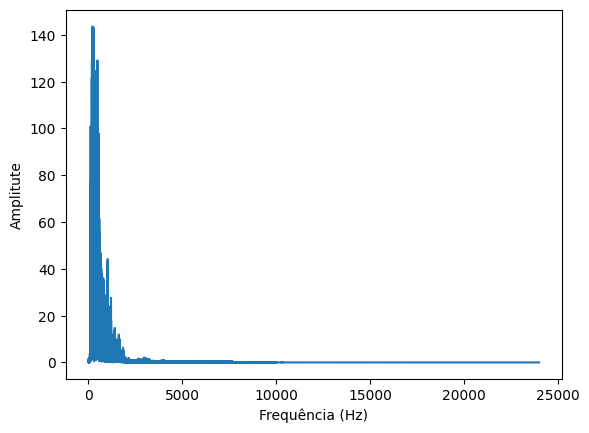

In [14]:
from scipy.fft import fft, fftfreq
import numpy as np
import matplotlib.pyplot as plt

# saindo de segundos e indo para hz
f = fftfreq(n,T)

# numero complexo (transformada)
transf = fft(data)

# módulo - para tirar os números complexos (módulo)
transf = np.abs(transf)

plt.plot(f[f > 0],transf[f > 0]*1/n) # mascara para pegar apenas os sinais com frequencias maiores que zeros e normalização o eixo vertical (dividir a transformada pelo tamanho do sinal)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitute')

In [11]:
totalSize = len(data)
chunkSize = 1024  # Tamanho do chunk de áudio
sampledChunkSize = totalSize // chunkSize
result = [None] * sampledChunkSize

for j in range(sampledChunkSize):
    complexArray = np.zeros(chunkSize, dtype=complex)
    for i in range(chunkSize):
        complexArray[i] = complex(data[(j * chunkSize) + i], 0)
    result[j] = fft(complexArray)
# Agora 'result' contém as transformadas de Fourier de cada chunk do áudio.


# Define as faixas de frequência
RANGE = np.array([40, 80, 120, 180, 300])

# Função para encontrar em qual faixa de frequência está uma determinada frequência
def getIndex(freq):
    i = 0
    while RANGE[i] < freq:
        i += 1
    return i

# Suponha que 'result' seja a matriz complexa obtida na etapa anterior
for t in range(len(result)):
    points = [0] * len(RANGE)
    for freq in range(40, 300):
        # Obter a magnitude
        mag = np.log(np.abs(result[t][freq]) + 1)

        # Descobrir em qual faixa estamos
        index = getIndex(freq)

        # Salvar a maior magnitude e a frequência correspondente
        if mag > points[index]:
            points[index] = freq

    # Formar o hash tag
    h = hash((points[0], points[1], points[2], points[3]))

    # print("Hash tag for time step", t, ":", h)

print(len(result))


600


In [12]:
import pandas as pd

# df_audio = pd.DataFrame({'Frequencia': f[f > 0], 'Transformada': transf[f > 0], 'Nome': 'AUDIO'})

df_joao = pd.DataFrame({'Frequencia': f[f > 0], 'Transformada': transf[f > 0], 'Nome': 'JOAO'})

# print(df_joao)
# plt.plot(df_joao['Frequencia'], df_joao['Transformada']*1/n)

In [13]:
print(df_joao)
print(df_audio)

          Frequencia   Transformada  Nome
0           0.078016  381504.936670  JOAO
1           0.156033  406522.905888  JOAO
2           0.234049  306561.994154  JOAO
3           0.312065  351904.936314  JOAO
4           0.390082  349317.200410  JOAO
...              ...            ...   ...
307622  23999.609918     491.196915  JOAO
307623  23999.687935     284.297783  JOAO
307624  23999.765951     357.862336  JOAO
307625  23999.843967     291.108861  JOAO
307626  23999.921984     112.494962  JOAO

[307627 rows x 3 columns]


NameError: name 'df_audio' is not defined

In [ ]:
import seaborn as sns
from sklearn import datasets

In [ ]:
concat = pd.concat([df_joao, df_audio])
# print(concat)

sns.pairplot(concat, hue='Nome')
plt.show()

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split

# Supondo que 'concat' é o DataFrame que você deseja usar
X = concat[['Frequencia', 'Transformada']]  # Características
y = concat['Nome']  # Rótulo de classe

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)
C = 1.0  # SVM regularization parameter
clf = svm.SVC(kernel='poly', C=C)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
clf.predict(X_test)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
clf.score(X_test,y_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=concat.target_names))